In [87]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from collections import Counter

In [76]:
data=pd.read_csv("kaggle-survey-2018/multipleChoiceResponses.csv")
preguntas=data.iloc[:1]
data = data.iloc[1:]

/srv/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.



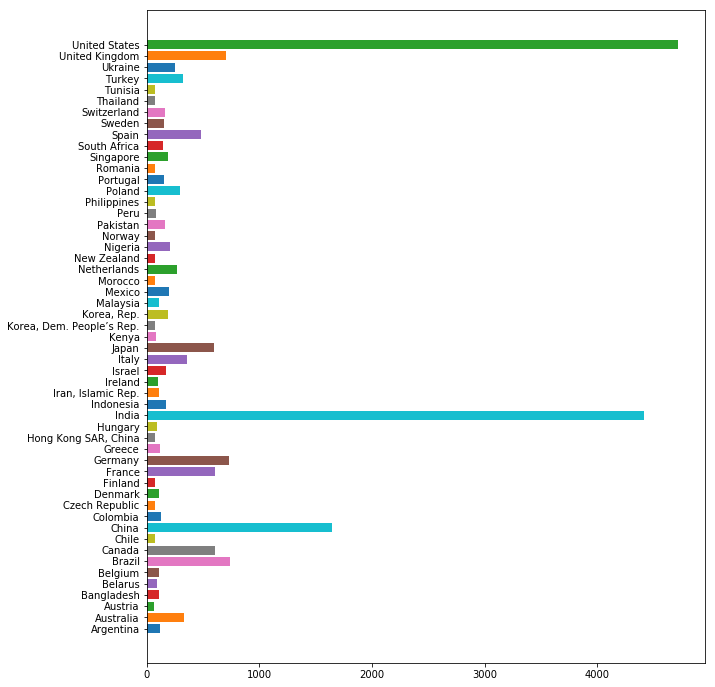

In [82]:
data=data[data["Q3"]!="I do not wish to disclose my location"]
a=Counter(data["Q3"])
a['United States'] = a.pop("United States of America")
a["United Kingdom"] = a.pop("United Kingdom of Great Britain and Northern Ireland")
a["Iran, Islamic Rep."] = a.pop("Iran, Islamic Republic of...")
a["Hong Kong SAR, China"] = a.pop("Hong Kong (S.A.R.)")
a["Korea, Dem. People’s Rep."] = a.pop("Republic of Korea")
a["Korea, Rep."] = a.pop("South Korea")
poblacion=pd.read_csv("https://raw.githubusercontent.com/datasets/population/master/data/population.csv")
population=poblacion.iloc[2624:]
population=population[population["Year"]==2016]

plt.figure(figsize=(10,12))
for i in population["Country Name"]:
    if i in a:
        plt.barh(i,a[i])
        v+=1
plt.show()  

/srv/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



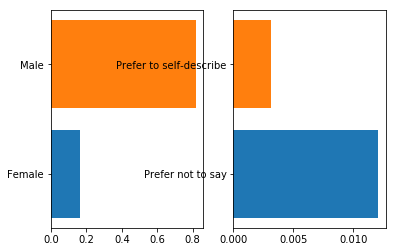

In [97]:
total=23465

for i in Counter(data["Q1"]):
    if i == 'Female' or i =='Male':
        plt.subplot(1,2,1)
        plt.barh(i,Counter(data["Q1"])[i]/total)
    else:
        plt.subplot(1,2,2)
        plt.barh(i,Counter(data["Q1"])[i]/total)
        

plt.show()

<Figure size 1080x432 with 0 Axes>

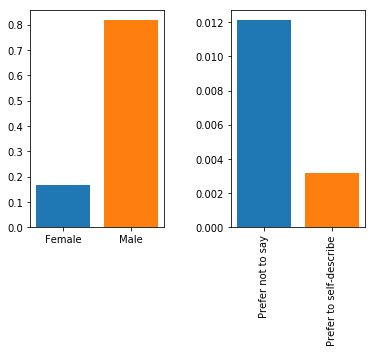

In [120]:
plt.figure(figsize=(15,6))

f, (ax1, ax2) = plt.subplots(1, 2)
total=23465
for i in Counter(data["Q1"]):
    if i == 'Female' or i =='Male':
        ax1.bar(i,Counter(data["Q1"])[i]/total)
        plt.xticks(rotation=90)
    else:
        ax2.bar(i,Counter(data["Q1"])[i]/total)
        plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)

plt.show()

In [101]:
data["Q3"]

'United States of America'